### 【問題1】自作データセットでの分類の学習 
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import sklearn.preprocessing as sp

import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

C:\Users\anai\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\anai\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\anai\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\anai\AppData\Roaming\Python\Python36\site-pack

In [2]:
path = r"C:\Users\anai\dive\Dataset\Sprint18\KADAI_1/"
x_list = os.listdir(path)
X_train = x_list[0:8]
X_test = x_list[8:10]
display(X_train)
display(X_test)

['0001 (2).jpg',
 '0001.jpg',
 '0002 (2).jpg',
 '0002.jpg',
 '0003 (2).jpg',
 '0003.jpg',
 '0004 (2).jpg',
 '0004.jpg']

['0005 (2).jpg', '0005.jpg']

In [3]:
x_img_array = np.empty((0,224,224,3))

for img in x_list:    
    # ファイル名に'dog'が含まれるイメージ
    #if re.search('dog', img):
    path_name = path+img
    x_img = Image.open(path_name)
        
    # サイズを揃える
    x_img = x_img.resize((224, 224))
    
    # PIL.Image.Imageからnumpy配列へ
    x_img = np.array(x_img)
        
    # 正規化
    x_img = x_img / 255.0
        
    # axisの追加
    x_img = x_img.reshape((1,224,224,3))
    x_img_array = np.concatenate([x_img_array, x_img], axis = 0)

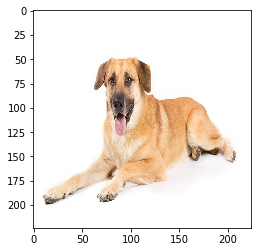

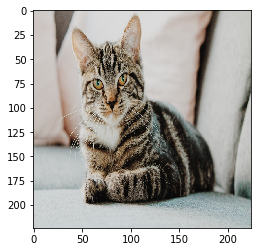

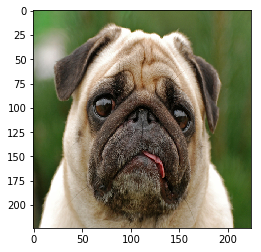

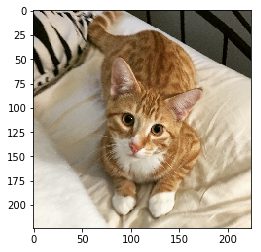

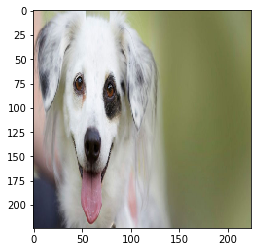

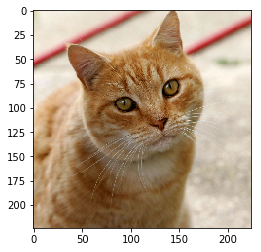

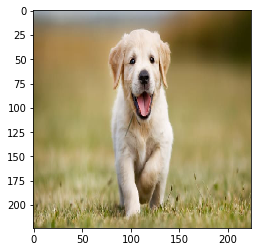

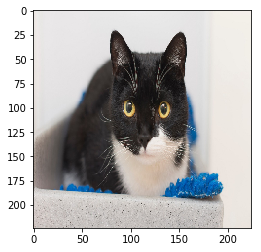

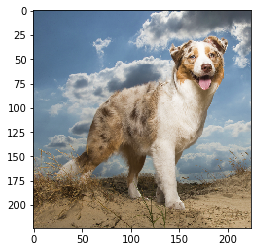

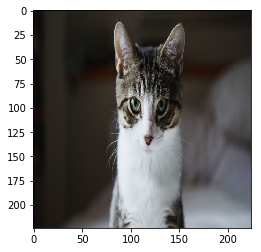

In [4]:
for i in range(len(x_img_array)):
    plt.imshow(x_img_array[i])
    plt.show()

In [5]:
x_img_array.shape

(10, 224, 224, 3)

In [6]:
X_train = x_img_array[0:6,:,:,:]
X_val = x_img_array[6:8,:,:,:]
X_test = x_img_array[8:10,:,:,:]
display(X_train.shape)
display(X_val.shape)
display(X_test.shape)

(6, 224, 224, 3)

(2, 224, 224, 3)

(2, 224, 224, 3)

In [7]:
y_train = ["dog", "cat", "dog", "cat", "dog", "cat"]
y_val = ["dog", "cat"]
y_test = ["dog", "cat"]

In [8]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D

from keras.layers.core import Dense, Activation, Dropout, Flatten
from sklearn.preprocessing import LabelEncoder


Using TensorFlow backend.


In [12]:
"""
TensorFlowで実装したニューラルネットワークを使いMNISTデータセットを3値分類する
"""


# 画像データを2次元に変換
display(X_train.shape)


#encoding
le = LabelEncoder()
#enc = Oneenc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)
y_test = le.fit_transform(y_test)

# trainとtestに分割
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)


# ハイパーパラメータの設定
learning_rate = 0.05
batch_size = 1
num_epochs = 10

n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1


# モデルの定義
model = Sequential()

model.add(Conv2D(32,(3,3), padding='same', input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 112x112
model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 56x56
model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 28x28
model.add(Flatten())
model.add(Dense(512))

model.add(Dense(n_classes, activation='sigmoid'))

adam = Adam(lr=0.01)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=["accuracy"])

model.summary()


(6, 224, 224, 3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
activation_4 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
activation_5 (Activation)    (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 128)       73856     
__________

In [13]:
batch_size = 1
nb_epoch = 10

history = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=nb_epoch, 
                    verbose=2,
                    validation_data=(X_val, y_val))

Train on 6 samples, validate on 2 samples
Epoch 1/10
 - 7s - loss: 8.0662 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 2/10
 - 4s - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 3/10
 - 4s - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 4/10
 - 4s - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 5/10
 - 5s - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 6/10
 - 4s - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 7/10
 - 4s - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 8/10
 - 4s - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 9/10
 - 4s - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 10/10
 - 4s - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000


### 【問題2】分類データセットに対するデータ拡張 
データ拡張（Data Augmentation）を行ってください。

ImportError: cannot import name 'img_as_float32'